# Projeto - Cafeteria LA

##### Você decidiu abrir uma pequena cafeteria com garçons robôs em Los Angeles. É um projeto bem promissor, mas caro, então você e seus parceiros decidem tentar atrair investidores. Eles estão interessados nas condições atuais do mercado e querem saber se você conseguirá manter seu sucesso quando a novidade de garçons robôs esmorecer.

### 1 -  Carregue os dados e prepare-os para a análise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rest_data_us = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
print(rest_data_us.info())
print(rest_data_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None
      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20 

In [4]:
#preparaçãodos dados
#valores ausentes
print(rest_data_us.isnull().sum())

#valores duplicados
print(rest_data_us.duplicated().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64
0


In [5]:
#preparação dados
#preenchendo valores ausentes com 'unknown'
rest_data_us['chain'].fillna('False', inplace=True)

#valores letras minúsculas
rest_data_us['object_name'] = rest_data_us['object_name'].str.lower()
rest_data_us['address'] = rest_data_us['address'].str.lower()
rest_data_us['object_type'] = rest_data_us['object_type'].str.lower()

#análise
print(rest_data_us.info())
print(rest_data_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None
      id          object_name                  address  chain object_type  \
0  11786  habitat coffee shop   3708 n eagle rock blvd  False        cafe   
1  11787             reilly's        100 world way 120  False  restaurant   
2  11788       street churros  6801 hollywood blvd 253  False   fast food   
3  11789    triniti echo park       1814 w sunset blvd  False  restaurant   
4  11790               pollen       2100 echo park ave  False  restaurant   

   number  
0      26  
1       9  
2      20 

In [6]:
# Converter a coluna 'chain' para tipo booleano
rest_data_us['chain'] = rest_data_us['chain'].astype('bool')

# Verificar a mudança
print(rest_data_us.info())
print(rest_data_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB
None
      id          object_name                  address  chain object_type  \
0  11786  habitat coffee shop   3708 n eagle rock blvd  False        cafe   
1  11787             reilly's        100 world way 120  False  restaurant   
2  11788       street churros  6801 hollywood blvd 253  False   fast food   
3  11789    triniti echo park       1814 w sunset blvd  False  restaurant   
4  11790               pollen       2100 echo park ave  False  restaurant   

   number  
0      26  
1       9  
2


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



## Passo 2. Análise de dados

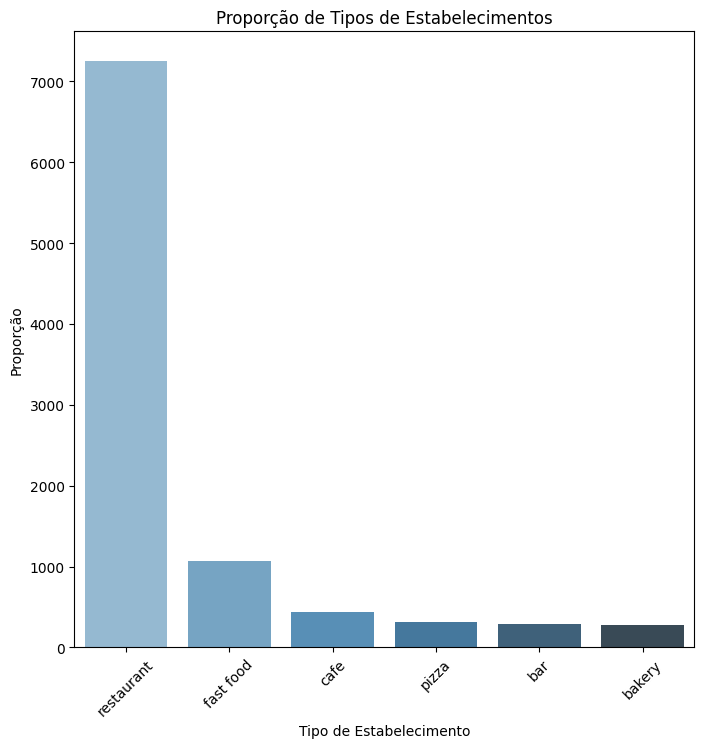

In [7]:
#1

#proporções dos tipos de estabelecimento
proportions = rest_data_us['object_type'].value_counts()

plt.figure(figsize=(8, 8))
sns.barplot(x=proportions.index, y=proportions.values, palette='Blues_d')
plt.title('Proporção de Tipos de Estabelecimentos')
plt.ylabel('Proporção')
plt.xlabel('Tipo de Estabelecimento')
plt.xticks(rotation=45)

plt.show()

- O gráfico mostra a proporção de diferentes tipos de estabelecimentos, e temos as seguintos conclusões:




<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Tipo de estabelecimento investigados!
</div>

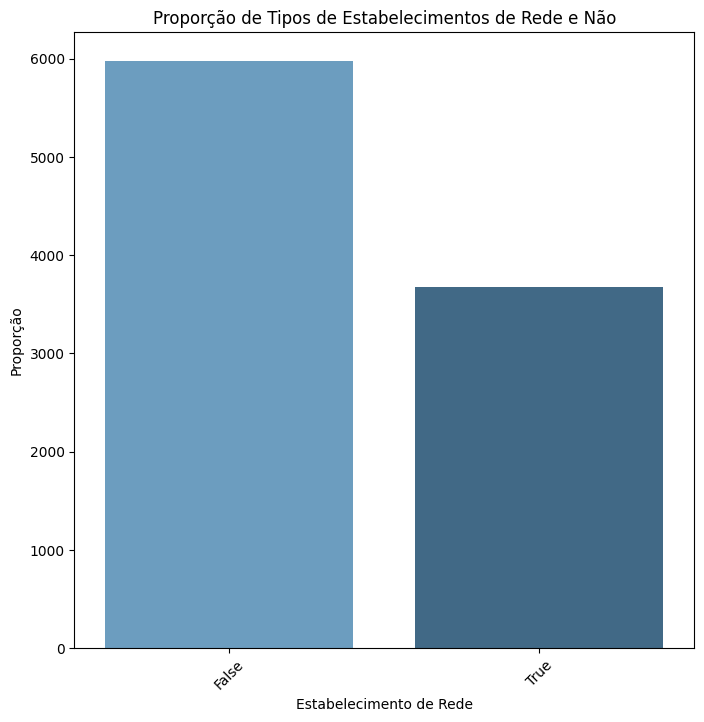

In [8]:
#1

#proporções dos tipos de estabelecimento de rede 
proportions_chain = rest_data_us['chain'].value_counts()

plt.figure(figsize=(8, 8))
sns.barplot(x=proportions_chain.index, y=proportions_chain.values, palette='Blues_d')
plt.title('Proporção de Tipos de Estabelecimentos de Rede e Não')
plt.ylabel('Proporção')
plt.xlabel('Estabelecimento de Rede')
plt.xticks(rotation=45)

plt.show()

In [9]:
#3
#estabelciamentos com rede e não
type_chain = rest_data_us.groupby(['chain', 'object_type']).size().unstack(fill_value=0)

#proporção de cada tipo de estabelecimento dentro de redes e não redes
type_chain_proportion = type_chain.div(type_chain.sum(axis=1), axis=0)

print(type_chain_proportion)

object_type    bakery       bar      cafe  fast food     pizza  restaurant
chain                                                                     
False        0.000000  0.036001  0.028299   0.077194  0.027796    0.830710
True         0.076923  0.020930  0.072302   0.164447  0.041859    0.623539


- De acordo com os dados, o tipo de estabelecimento mais comum em redes é o 'Restaurant', com cerca de 0,623539.
- Restaurantes Independentes Dominam: Apesar do sucesso das redes, os restaurantes independentes dominam o mercado em termos de proporção, o que pode indicar uma forte preferência por variedade e experiências locais entre os consumidores.



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Questão dos estabelecimentos pertencentes a redes foi explorado com detalhes.
</div>

In [10]:
#4
chains = rest_data_us[rest_data_us['chain'] == True]
non_chains = rest_data_us[rest_data_us['chain'] == False]

#número de estabelecimentos em cada categoria
num_chains = chains['id'].nunique()
num_non_chains = non_chains['id'].nunique()

#média de assentos para redes e não redes
avg_seats_chains = chains['number'].mean()
avg_seats_non_chains = non_chains['number'].mean()

print(f"Número total de estabelecimentos de redes: {num_chains}")
print(f"Número total de estabelecimentos independentes: {num_non_chains}")
print(f"Média de assentos por estabelecimento em redes: {avg_seats_chains:.2f}")
print(f"Média de assentos por estabelecimento em estabelecimentos independentes: {avg_seats_non_chains:.2f}")

Número total de estabelecimentos de redes: 3679
Número total de estabelecimentos independentes: 5972
Média de assentos por estabelecimento em redes: 39.68
Média de assentos por estabelecimento em estabelecimentos independentes: 46.17


- Estabelecimentos de rede – muitos locais, porém com poucos assentos.
- Estabelecimentos independentes são mais comuns, representando cerca de 62% do total (5972), enquanto as redes compõem os outros 38% (3679).



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Ótimo! O ponto solicitado foi devidamente endereçado.
</div>

In [11]:
#5
# Calcular o número médio de assentos por tipo de restaurante
avg_seats = rest_data_us.groupby('object_type')['number'].mean().reset_index()

# Renomear as colunas para melhor compreensão
avg_seats.columns = ['object_type', 'avg_number_of_seats']

# Ordenar os dados para facilitar a visualização
avg_seats = avg_seats.sort_values(by='avg_number_of_seats', ascending=False)

print(avg_seats)

# Identificar o tipo de restaurante com o maior número médio de assentos
largest_avg_seats_type = avg_seats.iloc[0]
print(f"Tipo de restaurante com o maior número médio de assentos: {largest_avg_seats_type['object_type']} ({largest_avg_seats_type['avg_number_of_seats']:.2f} assentos)")



  object_type  avg_number_of_seats
5  restaurant            48.042316
1         bar            44.767123
3   fast food            31.837711
4       pizza            28.459375
2        cafe            25.000000
0      bakery            21.773852
Tipo de restaurante com o maior número médio de assentos: restaurant (48.04 assentos)


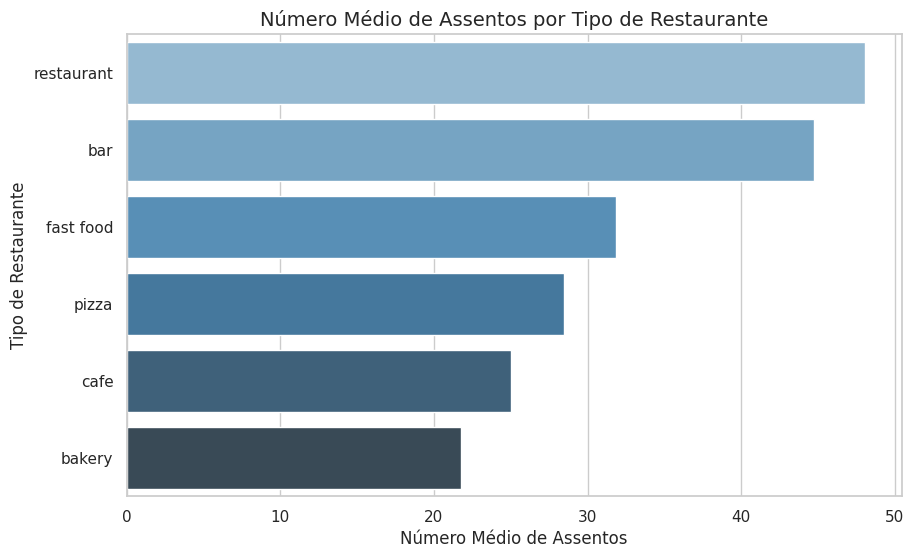

In [12]:
#5
# Configurar o estilo de Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_number_of_seats', y='object_type', data=avg_seats, palette='Blues_d')

# Adicionar título e rótulos aos eixos
plt.title('Número Médio de Assentos por Tipo de Restaurante', fontsize=14)
plt.xlabel('Número Médio de Assentos')
plt.ylabel('Tipo de Restaurante')

# Mostrar o gráfico
plt.show()

- Através do gráfico, podemos analisar que, em média, os estabelecimentos do tipo restaurante possuem a maior quantidade de assentos, cerca de 47.
- Isso pode se dever ao fato de serem ambientes onde as pessoas tendem a permanecer por mais tempo.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito, a média de assentos foi investigada corretamente.
</div>



In [13]:
#6
#supondo que o endereço siga o padrão "Número + Nome da Rua" (e.g., "3708 N Eagle Rock Blvd")
rest_data_us['street_name'] = rest_data_us['address'].str.extract(r'(\d+\s+(.+?))$', expand=False)[1]

print(rest_data_us[['address', 'street_name']].head())

                   address         street_name
0   3708 n eagle rock blvd   n eagle rock blvd
1        100 world way 120       world way 120
2  6801 hollywood blvd 253  hollywood blvd 253
3       1814 w sunset blvd       w sunset blvd
4       2100 echo park ave       echo park ave


In [14]:
#7

#restaurantes por rua
restaurants_per_street = rest_data_us['street_name'].value_counts().reset_index()
restaurants_per_street.columns = ['street_name', 'restaurant_count']

#as 10 com mais restaurantes
top_10 = restaurants_per_street.head(10)

print(top_10)

         street_name  restaurant_count
0      w sunset blvd               297
1        w pico blvd               289
2     hollywood blvd               168
3      wilshire blvd               161
4      s vermont ave               148
5  santa monica blvd               146
6           w 3rd st               145
7       beverly blvd               135
8      s figueroa st               134
9        melrose ave               128


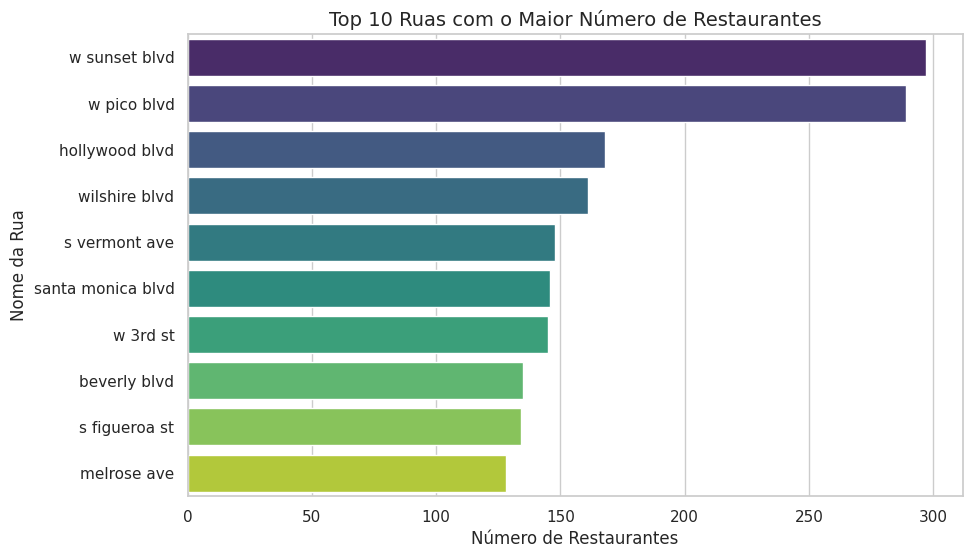

In [15]:
#7
plt.figure(figsize=(10, 6))
sns.barplot(x='restaurant_count', y='street_name', data=top_10, palette='viridis')
plt.title('Top 10 Ruas com o Maior Número de Restaurantes', fontsize=14)
plt.xlabel('Número de Restaurantes')
plt.ylabel('Nome da Rua')

plt.show()

- De acordo com o gráfico, podemos observar a quantidade de restaurantes em cada rua, com destaque para W Sunset Blvd e W Pico Blvd, que lideram com quase 300 restaurantes cada.

In [16]:
#8
#ruas com apenas 1 restaurante
only_1 = restaurants_per_street[restaurants_per_street['restaurant_count']==1]

num_streets_only_1 = only_1.shape[0]

print(f"Número de ruas que têm apenas um restaurante: {num_streets_only_1}")

Número de ruas que têm apenas um restaurante: 2437


- De acordo com os dados exitem 2437 ruas com apenas 1 restaurante.

In [17]:
#9
#número de restaurantes por rua
restaurants_per_street = rest_data_us['street_name'].value_counts().reset_index()
restaurants_per_street.columns = ['street_name', 'restaurant_count']

#ruas com o maior número de restaurantes (por exemplo, as 10 maiores)
top_streets = restaurants_per_street.head(10)

#localidades
top_streets_data = rest_data_us[rest_data_us['street_name'].isin(top_streets['street_name'])]

#total de assentos por rua
total_seats_per_street = top_streets_data.groupby('street_name')['number'].sum().reset_index()

#merge
top_streets_summary = pd.merge(top_streets, total_seats_per_street, on='street_name')

#Renomear as colunas
top_streets_summary.columns = ['street_name', 'restaurant_count', 'total_seats']

print(top_streets_summary)

         street_name  restaurant_count  total_seats
0      w sunset blvd               297        15082
1        w pico blvd               289        11781
2     hollywood blvd               168         8978
3      wilshire blvd               161        10003
4      s vermont ave               148         6790
5  santa monica blvd               146         4729
6           w 3rd st               145         6370
7       beverly blvd               135         6044
8      s figueroa st               134         6802
9        melrose ave               128         6711


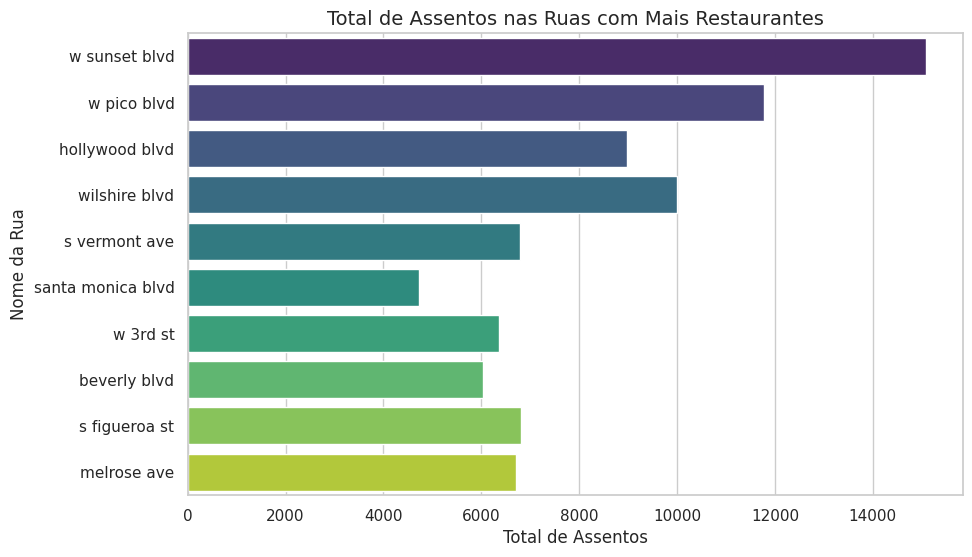

In [18]:
#gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='total_seats', y='street_name', data=top_streets_summary, palette='viridis')
plt.title('Total de Assentos nas Ruas com Mais Restaurantes', fontsize=14)
plt.xlabel('Total de Assentos')
plt.ylabel('Nome da Rua')

plt.show()

- Ruas com muitos restaurantes e grande capacidade de assentos podem sugerir áreas comerciais movimentadas, com grandes estabelecimentos ou redes de restaurantes.
- Ruas com muitos restaurantes, mas com menos assentos podem estar associadas a estabelecimentos menores (cafés ou fast foods), que atendem a um volume alto de clientes com menos espaço.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito, toda a manipulação e investigação dos endereços aconteceu adequadamente!
</div>



# Apresentação do Projeto

Presentation: https://drive.google.com/file/d/133O1d_km9QHx8ZJzBJcpo-XF0ANxMoWv/view?usp=sharing



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Apresentação fornecida!
</div>